# Imports

In [180]:
"""------------SECTION IMPORTS---------------------"""
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score
import joblib
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define search space for number of trees in random forest and depth of trees
num_trees_min = 64
num_trees_max = 128

depth_min = 2
depth_max = 7

# Load data

In [181]:
df = pd.read_csv("data/no_missings_sy.csv")
df = df.drop("Unnamed: 0",axis=1)
df.head()

,date,district,prevalence,next_prevalence,prevalence_6lag,ndvi,ipc,population,month,district_encoded,increase
0,2018-01-01,Burco,0.20280,0.22114,0.33594,0.18500,0.05000,534884.89500,1,21,True
1,2018-01-01,Xudur,0.48620,0.46890,0.48620,0.24833,0.14000,113853.10500,1,77,False
2,2018-01-01,Bossaso,0.34320,0.48221,0.41606,0.14833,0.01000,316531.98000,1,18,True
3,2018-01-01,Cadale,0.35100,0.28292,0.36920,0.22667,0.00000,48461.80500,1,27,False
4,2018-01-01,Qoryooley,0.35100,0.43638,0.36920,0.34667,0.09000,196309.48500,1,65,True


In [182]:
'''------------SECTION RANDOM FOREST CROSS VALIDATION--------------'''
# WARNING: this process can take some time, since there are a lot of hyperparameters to investigate. The search space can be manually reduced to speed up the process.

# Create empty list to store model scores
parameter_scores = []

# Define target and explanatory variables
X = df.select_dtypes(exclude=["category","object"]).drop(["increase", "prevalence", "next_prevalence"],axis=1)
y = df['next_prevalence'].values

# Load model

In [183]:
loaded_model_sy = joblib.load("baseline_semiyearly_model.joblib")

In [184]:
loaded_model_sy

RandomForestRegressor(max_depth=2, n_estimators=122, n_jobs=-1, random_state=0)

# Evaluate model

In [185]:
train_split = 345

In [186]:
# Perform evaluation on full data
Xtrain = X[:train_split]
ytrain = y[:train_split]
Xtest = X[train_split:]
ytest = y[train_split:]

In [187]:
loaded_model_sy.fit(Xtrain, ytrain)
predictions = loaded_model_sy.predict(Xtest)

# Visualise predictions

In [188]:
len(ytest), len(predictions)

(138, 138)

In [189]:
from helper_metrics import plot_time_series

In [190]:
from datetime import datetime
timesteps = [datetime.strptime(i, "%Y-%m-%d") for i in df.date]

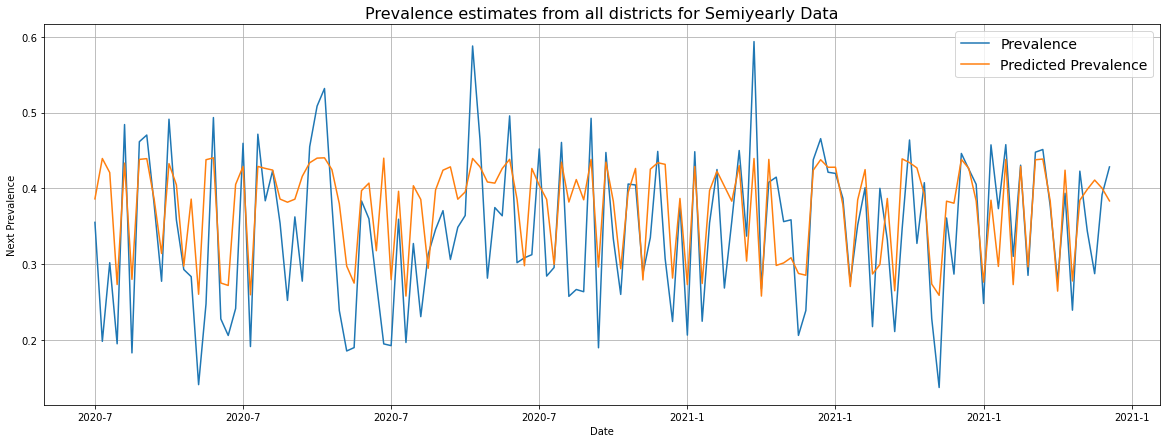

In [191]:
plt.figure(figsize=(20,7))
plt.title("Prevalence estimates from all districts for Semiyearly Data",size=16)
plot_time_series(timesteps=np.arange(138),values=ytest, label="Prevalence")
plot_time_series(timesteps=np.arange(138),values=predictions, label="Predicted Prevalence")
plt.xticks(np.arange(0,160,step=20),labels=["2020-7", "2020-7", "2020-7", "2020-7", "2021-1","2021-1", "2021-1","2021-1"]);